# Getting Started Notebook

In this notebook we will have a few examples on how to read the data and work with it.

To load the data we will use the [datasets](https://pytorch.org/vision/stable/datasets.html) class from pyTorch

In [79]:
import torch
import os

import numpy as np
import plotly.express as px
import plotly.graph_objects as go

from torchvision import datasets, transforms
from plotly.subplots import make_subplots

## Loading data

In [72]:
data_dir = '../data/Plant_leave_diseases_dataset_with_augmentation'

data_transform = transforms.Compose([
                    transforms.RandomResizedCrop(256),
                    transforms.ToTensor()
                ])

dataset = datasets.ImageFolder(data_dir, transform=data_transform)

# print out some data stats
print('Num images: ', len(dataset))

Num images:  61486


In [85]:
# generating class names from file paths
classes = [f for f in os.listdir(data_dir)]

### Generating a data loader and taking a sample batch

For this we will use the [data loader](https://pytorch.org/docs/stable/data.html) class from pyTorch.

In [73]:
batch = 10
workers = 0


data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch, num_workers=workers, shuffle=True)

### Plotting images

In [74]:
dataiter = iter(data_loader)
images, labels = dataiter.next()
images = images.numpy()


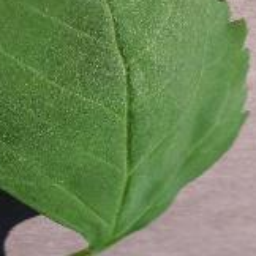

In [75]:
img_0 = images[0]
fig = px.imshow(np.transpose(img_0, (1, 2, 0)))
fig.show()

['Cherry___Powdery_mildew',
 'Tomato___Target_Spot',
 'Peach___Bacterial_spot',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Background_without_leaves',
 'Corn___Northern_Leaf_Blight',
 'Tomato___Target_Spot',
 'Corn___Northern_Leaf_Blight',
 'Soybean___healthy']


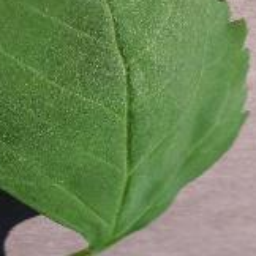
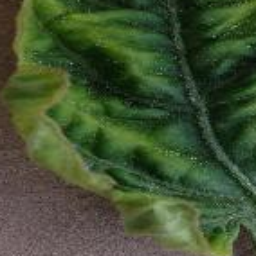
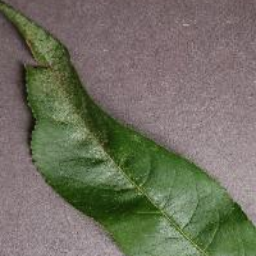
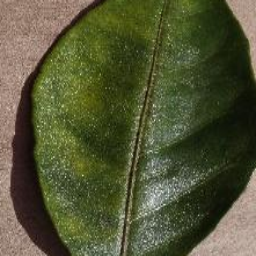
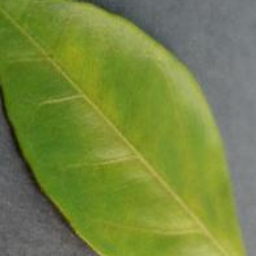
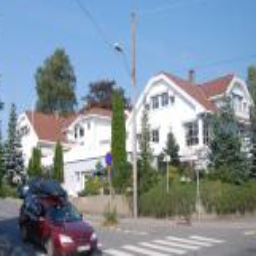
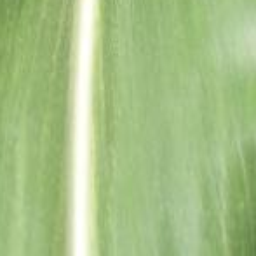
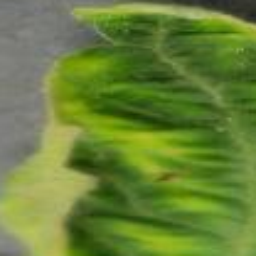
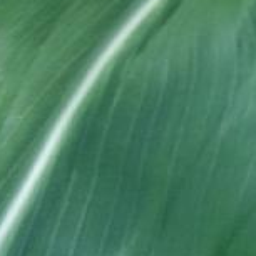
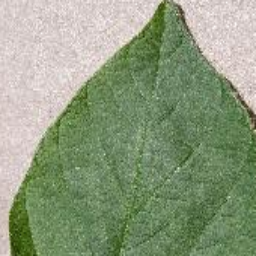

In [98]:
ncol=5
nrow=2

fig = make_subplots(rows=nrow, cols=ncol,
                    subplot_titles=[classes[labels[i]] for i in range(len(list(labels)))]
                   )

for i, image in enumerate(images):
    fig.add_trace(px.imshow(np.transpose(image, (1, 2, 0))).data[0], row=int((i/ncol)+1), col=int(i%ncol+1))

fig.update_annotations(font_size=8)
fig.show()

In [77]:
list(enumerate(zip(images, labels)))[0]

(0,
 (array([[[0.34509805, 0.3372549 , 0.3254902 , ..., 0.69411767,
           0.69411767, 0.69411767],
          [0.34901962, 0.34117648, 0.33333334, ..., 0.7058824 ,
           0.7058824 , 0.7058824 ],
          [0.3529412 , 0.34901962, 0.34117648, ..., 0.7254902 ,
           0.72156864, 0.72156864],
          ...,
          [0.10980392, 0.11372549, 0.1254902 , ..., 0.6784314 ,
           0.68235296, 0.68235296],
          [0.09803922, 0.09803922, 0.10980392, ..., 0.69411767,
           0.6901961 , 0.6901961 ],
          [0.09019608, 0.09019608, 0.10196079, ..., 0.7019608 ,
           0.69803923, 0.69803923]],
  
         [[0.4862745 , 0.47843137, 0.46666667, ..., 0.6156863 ,
           0.6156863 , 0.6156863 ],
          [0.49019608, 0.48235294, 0.4745098 , ..., 0.627451  ,
           0.627451  , 0.627451  ],
          [0.49411765, 0.49019608, 0.48235294, ..., 0.64705884,
           0.6431373 , 0.6431373 ],
          ...,
          [0.11372549, 0.11372549, 0.12156863, ..., 0.6039216 

In [86]:
[classes[l] for l in labels]

['Cherry___Powdery_mildew',
 'Tomato___Target_Spot',
 'Peach___Bacterial_spot',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Background_without_leaves',
 'Corn___Northern_Leaf_Blight',
 'Tomato___Target_Spot',
 'Corn___Northern_Leaf_Blight',
 'Soybean___healthy']